# Dynapse Brian2GeNN template
By Ioan Fodorut

Linux is the recommended platform as it allows for easiest set-up of CUDA and Genn.

Running steps:
- Checkout GeNN from git (counterintuitively, Python wheels of GeNN don't help you here!)
	
	!git clone --branch 4.7.1 https://github.com/genn-team/genn.git
- Install CUDA
- Install Brian2 (only versions below 2.5 work) 
	
	!pip install "brian2<2.5"
	
	!pip install brian2genn

- Set the CUDA and GENN paths by changing the paths below to your installation and clone directories
- Have fun! :)

If in trouble, the following link contains a Colab of a working set-up, albeit not using the Dynapse equations
	
	https://colab.research.google.com/drive/1WMHf69GXtHQc3BDtJFDJCuN48mAMlTDm#scrollTo=a7n867ti2XTb

Before starting to write a new experiment please refer to the following link for a discussion on how to write it for optimum performance:
	
	https://brian.discourse.group/t/brian2genn-sigsegv-error/152/2

Unfortunately there are Brian2 features missing from GeNN so you might have to rewrite your code. Refer to the following link for the unsupported features:

	https://brian2genn.readthedocs.io/en/stable/introduction/exclusions.html


In [1]:
%env CUDA_PATH=/usr/local/cuda
%env GENN_PATH=/home/ioan/Documents/genn

env: CUDA_PATH=/usr/local/cuda
env: GENN_PATH=/home/ioan/Documents/genn


In [2]:
from brian2 import *
from gpu_example_experiment import run_experiment

In [3]:
params = dict(
	_exp_duration_ = 1000,
	_input_rate_ = 1000,
	_nr_inputs_ = 10,
	_nr_neurons_ = 1,
	_ampa_weight_ = 1,
)

result = run_experiment(params)

INFO       The following preferences have been changed for Brian2GeNN, reset them manually if you use a different device later in the same script: codegen.loop_invariant_optimisations, core.network.default_schedule [brian2.devices.genn]


Process 54798 launched, at 05_25_2022_01_03_26
running brian code generation ...
building genn executable ...
['/home/ioan/Documents/genn/bin/genn-buildmodel.sh', '-i', '/home/ioan/Documents/Dynapse/dynapse-simulator/examples:/home/ioan/Documents/Dynapse/dynapse-simulator/examples/gpu_run_54798_05_25_2022_01_03_26:/home/ioan/Documents/Dynapse/dynapse-simulator/examples/gpu_run_54798_05_25_2022_01_03_26/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...


# DT 0.000020 
# totalTime 1.000000 
# We are running with fixed time step 0.000020 
1 done ...
everything finished.


As an example, run CUBA example

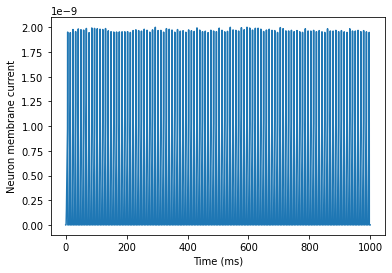

In [4]:
for j in range(0, 1):
	plot(result['neuron_membrane_current'][0], result['neuron_membrane_current'][1][j])
xlabel('Time (ms)')
ylabel('Neuron membrane current')
show()

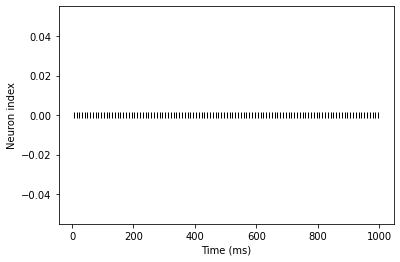

In [5]:
plot(result['neuron_spike_output'][0], result['neuron_spike_output'][1], '|k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()

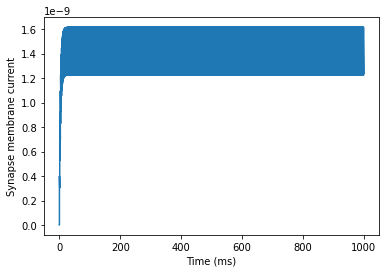

In [6]:
plot(result['synaptic_current'][0], result['synaptic_current'][1][0])
xlabel('Time (ms)')
ylabel('Synapse membrane current')
show()